# Business Case

Car price analysis and prediction in USA automobile market. The target is to find the key factors that price of a car depends in the USA.

Data : For this study, I am using a dataset retrived from Kaggle.

### 1.0 Data Loading and exploration

In [68]:
#importing required libraries

import pandas as pd
import numpy as np


#importing libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns



In [69]:
cd /Users/darshana/downloads

/Users/darshana/Downloads


In [70]:
pd_cars = pd.read_csv('CarPrice_Assignment.csv')
pd_cars.shape

(205, 26)

In [71]:
pd_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 1.1 Data Cleaning

In [72]:
#checking for any null values
pd_cars.isna().sum()

#it seems the data set complete with no null values.

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [73]:
pd_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
pd_cars.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [75]:
# CarName column contains both company name and the car name, so we need to extract the car name from it.
# Here we are splitting the CarName values by space and consider the first substring is the company name.

Company_Name = pd_cars['CarName'].apply(lambda x : x.split(' ')[0])
pd_cars.insert(3,"CompanyName",Company_Name)
pd_cars.drop(['CarName'],axis=1,inplace=True)
pd_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
pd_cars.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
renault         2
maxda           2
mercury         1
Nissan          1
vokswagen       1
porcshce        1
toyouta         1
Name: CompanyName, dtype: int64

In [77]:
#it seems some of the comapny names have spelling mistakes, so here I am correcting them

pd_cars.CompanyName = pd_cars.CompanyName.str.lower()

def replace_name(a,b):
    pd_cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

pd_cars.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [78]:
pd_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1.2 Data Visualization and Understanding

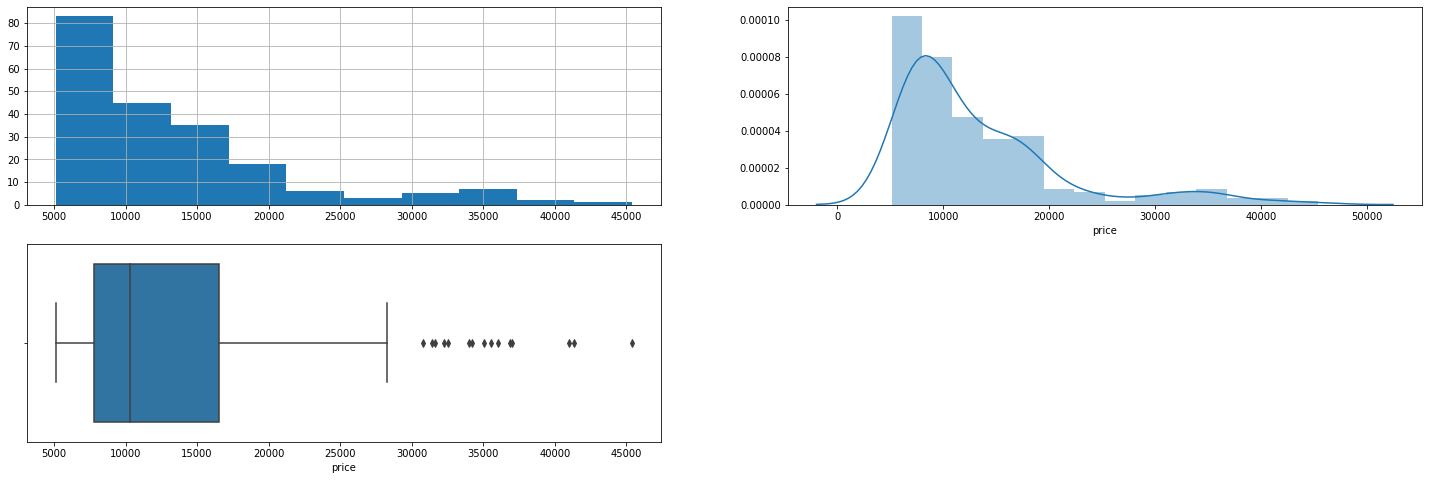

In [85]:
plt.figure(figsize =(25,8))

plt.subplot(2,2,1)
pd_cars['price'].hist()

plt.subplot(2,2,2)
sns.distplot(pd_cars['price'])

plt.subplot(2,2,3)
sns.boxplot(pd_cars['price'])

plt.show()

In [84]:
print(pd_cars.price.describe(percentiles = [0.25,0.50,0.75,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


As per above figures, the distribution is right skewd and contain outlies as well. So in next step the outliers will be removed using IQR method 

In [82]:
#Removing outliers using IQR method

Q1 = pd_cars['price'].quantile(0.25)
Q3 = pd_cars['price'].quantile(0.75)
IQR = Q3-Q1

pd_cars_x =pd_cars[(pd_cars['price'] > (Q3 + 1.5 * IQR))]

In [87]:
print(pd_cars_x.price.describe(percentiles = [0.25,0.50,0.75,1]))

count       15.000000
mean     35662.633333
std       4172.232404
min      30760.000000
25%      32389.000000
50%      35056.000000
75%      36954.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


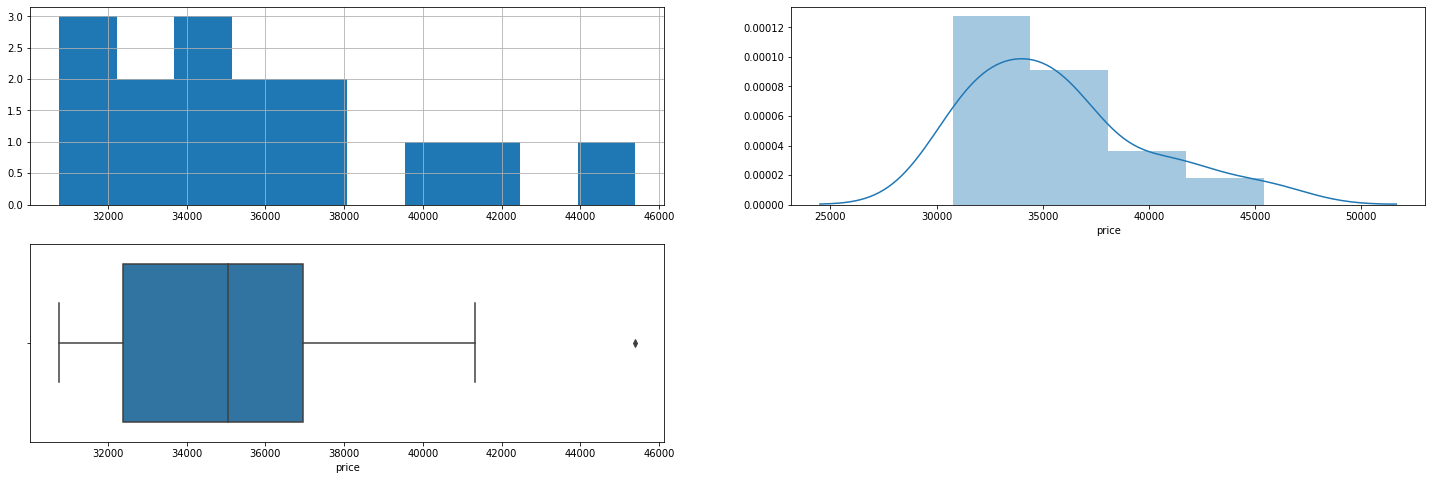

In [88]:
plt.figure(figsize =(25,8))

plt.subplot(2,2,1)
pd_cars_x['price'].hist()

plt.subplot(2,2,2)
sns.distplot(pd_cars_x['price'])

plt.subplot(2,2,3)
sns.boxplot(pd_cars_x['price'])

plt.show()

Visualizing the other fields of the dataset

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.


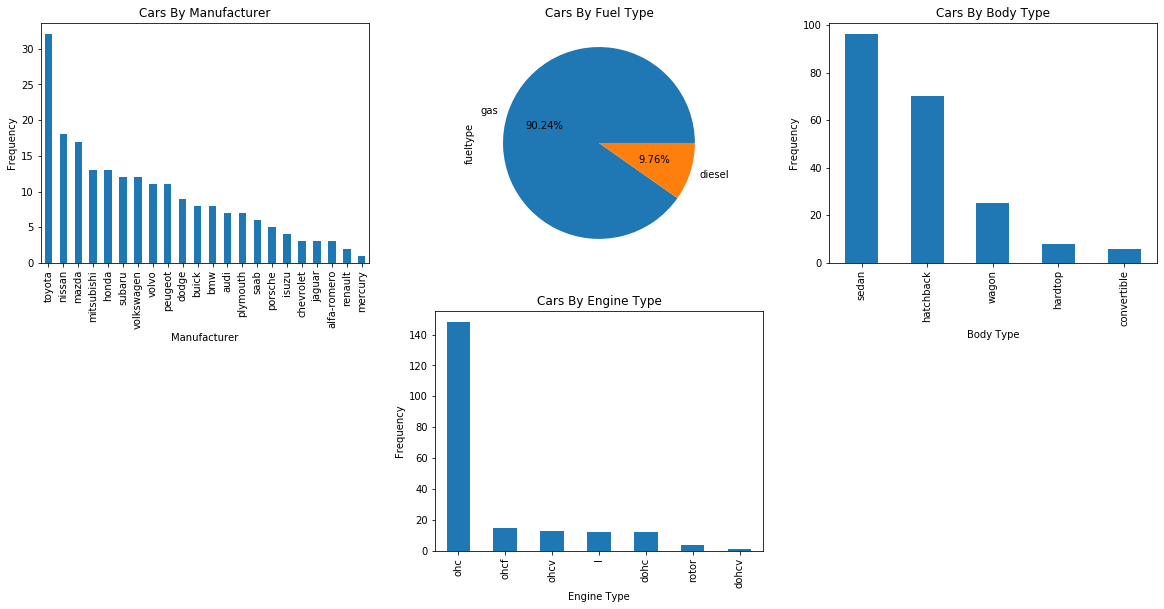

In [98]:
plt.figure(figsize =(20,15))

plt.subplot(3,3,1)
pltx = pd_cars.CompanyName.value_counts().plot('bar')
plt.title('Cars By Manufacturer')
pltx.set(xlabel = 'Manufacturer', ylabel='Frequency')

plt.subplot(3,3,2)
pd_cars.fueltype.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
plt.title("Cars By Fuel Type")

plt.subplot(3,3,3)
pltx = pd_cars.carbody.value_counts().plot('bar')
plt.title('Cars By Body Type')
pltx.set(xlabel = 'Body Type', ylabel='Frequency')

plt.subplot(3,3,5)
pltx = pd_cars.enginetype.value_counts().plot('bar')
plt.title('Cars By Engine Type')
pltx.set(xlabel = 'Engine Type', ylabel='Frequency')

plt.show()

### 1.2.1 Observations

1. Toyota is the manufacture of most of the cars in the data set
2. Most cars use gasoline as the fuel
3. Sedan type cars have higer market than the other types of cars


### 1.3 Finding the correlationships of each attribute with the car price